Text Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sameermahajan/MLWorkshop/master/3.%20Clustering/people_wiki.csv')

In [3]:
df = df.head(100)

Feature Extraction

In [4]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

Model Training

In [5]:
cls = MiniBatchKMeans(n_clusters=5, random_state=0)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

Predict cluster labels for new dataset

In [6]:
cls.predict(features)

array([1, 4, 4, 4, 0, 4, 4, 4, 4, 3, 4, 3, 2, 4, 3, 4, 4, 1, 4, 3, 2, 1,
       1, 0, 4, 1, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 3, 4,
       4, 4, 4, 4, 1, 1, 4, 4, 3, 0, 3, 4, 4, 4, 0, 4, 4, 4, 4, 1, 2, 0,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 3, 1], dtype=int32)

In [7]:
cls.labels_

array([1, 4, 4, 4, 0, 4, 4, 4, 4, 3, 4, 3, 2, 4, 3, 4, 4, 1, 4, 3, 2, 1,
       1, 0, 4, 1, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 3, 4,
       4, 4, 4, 4, 1, 1, 4, 4, 3, 0, 3, 4, 4, 4, 0, 4, 4, 4, 4, 1, 2, 0,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3,
       4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 3, 1], dtype=int32)

In [8]:
a = cls.labels_

In [9]:
len(a)

100

In [10]:
df.count()

URI     100
name    100
text    100
dtype: int64

Visualization

In [11]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

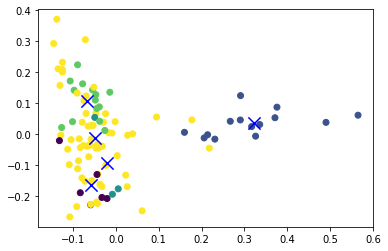

In [12]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')